## Cartpole

In [1]:
using TrajectoryOptimization
using Plots, LinearAlgebra, MeshCat, MeshCatMechanisms, RigidBodyDynamics, GeometryTypes, CoordinateTransformations

┌ Info: Recompiling stale cache file /home/taylor/.julia/compiled/v1.1/TrajectoryOptimization/UVgeA.ji for TrajectoryOptimization [c79d492b-0548-5874-b488-5a62c1d9d0ca]
└ @ Base loading.jl:1184
┌ Warning: Package TrajectoryOptimization does not have MatrixCalculus in its dependencies:
│ - If you have TrajectoryOptimization checked out for development and have
│   added MatrixCalculus as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with TrajectoryOptimization
└ Loading MatrixCalculus into TrajectoryOptimization from project dependency, future warnings for TrajectoryOptimization are suppressed.


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Get path to urdf file

In [27]:
traj_folder = joinpath(dirname(pathof(TrajectoryOptimization)),"..")
urdf_folder = joinpath(traj_folder, "dynamics/urdf")
urdf = joinpath(urdf_folder, "cartpole.urdf");

Load cartpole model

In [7]:
model = Dynamics.cartpole_model_urdf
n = model.n
m = model.m;

Define numerical type

In [8]:
T = Float64;

Define initial and goal states

In [31]:
x0 = [0.0;-pi;0.0;0.0]
xf = [0.0;0.;0.0;0.0]

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

Define a cost function

In [32]:
Q = 0.01*Diagonal(I,n)
Qf = 1000.0*Diagonal(I,n)
R = 0.01*Diagonal(I,m)

cost = LQRCost(Q,R,Qf,xf);

Create terminal constraints

In [33]:
goal = goal_constraint(xf);

Create problem

In [34]:
N = 201
dt = 0.01
tf = (N-1)*dt

U = [ones(m) for k = 1:N-1]

obj = Objective(cost,N)
con = TrajectoryOptimization.ProblemConstraints([goal],N)

prob = Problem(model,obj,constraints=con,x0=x0,N=N,dt=dt)
initial_controls!(prob, U);

Solver options

In [35]:
opts_ilqr = TrajectoryOptimization.iLQRSolverOptions(verbose=true, cost_tolerance=1.0e-6)

opts_al = AugmentedLagrangianSolverOptions{T}(verbose=false,opts_uncon=opts_ilqr,
    iterations=30,penalty_scaling=10.0, cost_tolerance=1.0e-6,cost_tolerance_intermediate=1.0e-5,
    constraint_tolerance=1.0e-4)

opts_altro = TrajectoryOptimization.ALTROSolverOptions{T}(verbose=false,opts_al=opts_al);

Solve problem

In [36]:
solve!(prob, opts_altro) # solve with ALTRO

    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     3281.1566681  2172.40484  0.778871  0.25      0e+00     1692.024  50.34782 0          
    2     2604.5061672  766.178979  0.883149  0.125     0e+00     676.6505  21.7391  0          
    3     2105.2108928  608.538175  0.820483  0.125     0e+00     499.2953  18.96183 0          
    4     1691.0948357  490.116795  0.844933  0.125     0e+00     414.1161  18.44866 0          
    5     1347.6037116  392.312531  0.875555  0.125     0e+00     343.4911  13.00283 0          
    6     1075.3820356  311.428925  0.874105  0.125     0e+00     272.2217  10.4613  0          
    7     860.0595756   247.353513  0.870505  0.125     0e+00     215.3225  10.85378 0          
    8     685.09617334  196

    62    9.3592059226  0.06211755  0.526852  0.5       0e+00     0.032727  0.206808 0          
    63    9.3440968857  0.0737184   0.204956  0.0625    0e+00     0.015109  0.482858 0          
    64    9.3344967372  0.02041322  0.470291  0.125     0e+00     0.0096    0.247128 0          
    65    9.331810594   0.02442439  0.109978  0.125     0e+00     0.002686  0.241786 0          
    66    9.3269305521  0.03198808  0.152558  0.125     0e+00     0.00488   0.312513 0          
    67    9.3184572581  0.02282906  0.371163  0.0625    0e+00     0.008473  0.294379 0          
    68    9.3075493397  0.03914311  0.278668  0.5       0e+00     0.010908  0.176794 0          
    69    9.2907144365  0.06859405  0.245428  0.0625    0e+00     0.016835  0.477724 0          
    70    9.2838973016  0.0157382   0.433158  0.125     0e+00     0.006817  0.237799 0          
    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                           

    125   9.1016686761  0.0039663   0.490865  0.0625    0e+00     0.001947  0.104    0          
    126   9.1004080554  0.00202282  0.623199  0.5       0e+00     0.001261  0.026474 0          
    127   9.1002504957  0.00472877  0.033319  0.125     0e+00     0.000158  0.084551 0          
    128   9.0999652784  0.00574443  0.049651  0.125     0e+00     0.000285  0.105536 0          
    129   9.0981746151  0.00366074  0.489153  0.0625    0e+00     0.001791  0.103111 0          
    130   9.0969933659  0.00184572  0.639995  0.5       0e+00     0.001181  0.025865 0          
    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    131   9.0968451611  0.00412999  0.035885  0.125     0e+00     0.000148  0.082466 0          
    132   9.0965882833  0.0

    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     9.0804071368  0.00163     0.094978  0.125     0e+00     0.000155  0.049029 0          
    2     9.0803346527  0.00180195  0.040225  0.125     0e+00     7.25e-05  0.056292 0          
    3     9.0802470517  0.00200856  0.043614  0.125     0e+00     8.76e-05  0.054582 0          
    4     9.0796545636  0.00116772  0.507387  0.0625    0e+00     0.000592  0.059375 0          
    5     9.0794275475  0.00046818  0.484894  1         0e+00     0.000227  0.007233 0          
    6     9.0789791439  0.00088705  0.505501  0.0625    0e+00     0.000448  0.047622 0          
    7     9.0788672718  0.00021157  0.528783  1         0e+00     0.000112  0.005008 0          
    8     9.0788619486  0.0

Plot state trajectory

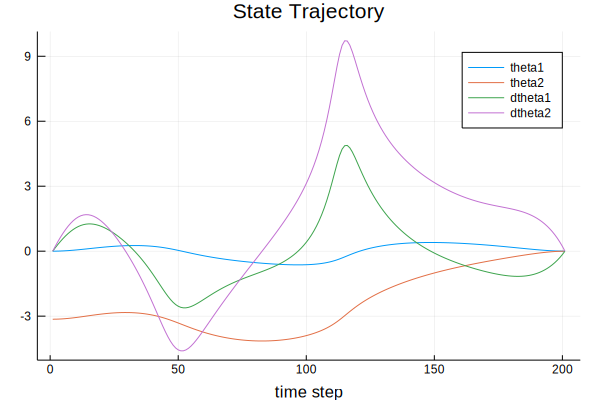

In [52]:
plot(prob.X,xlabel="time step",title="State Trajectory",label=["theta1" "theta2" "dtheta1" "dtheta2"])

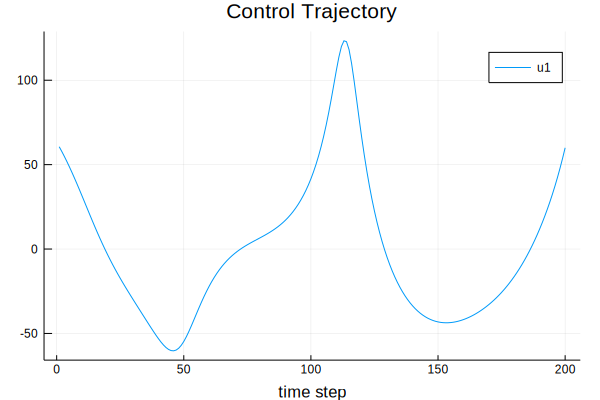

In [38]:
plot(prob.U,xlabel="time step",title="Control Trajectory",label=["u1" "u2"])

Visualizer

In [22]:
vis = Visualizer()
# open(vis)
IJuliaCell(vis)

WebIO.Scope("scope-29bfe614-176b-4b5a-b9c0-cf3a9cc1e44c", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :iframe), Any[], Dict{Symbol,Any}(:attributes=>Dict{String,Any}("height"=>"100%","scrolling"=>"no","src"=>"javascript:void(0)","frameborder"=>0),:id=>"ifr",:style=>Dict("width"=>"100%","flexGrow"=>"1")), 0)], Dict{Symbol,Any}(:style=>Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden")), 1), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}(), Set(String[]), nothing, Any[], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Ensure that the iframe's baseURI matches the baseURI of the\n    // outer document. This is necessary to resolve\n    // https://github.com/JuliaGizmos/WebIO.jl/issues/167\n    var base = doc.createElement(\"base\");\n    base.setAttribute(\"href\", document.baseURI);\n    doc.head.appendChild(base);\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;/assetserver/39091d6b9eb892b592bedf9cea6c288f61f7d3f3-main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-811fcc65-140e-41b1-ba7b-07809c0b1f5c&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-811fcc65-140e-41b1-ba7b-07809c0b1f5c&quot;,&quot;id&quot;:&quot;ob_02&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); window.document.body.style.margin=&quot;0&quot;; return window.meshcat_viewer=this.viewer})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_01&quot;,&quot;value&quot;:[]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_03&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_02&quot;,&quot;value&quot;:&quot;&quot;}}},&quot;children&quot;:[{&quot;props&quot;:{&quot;className&quot;:&quot;meshcat-viewer&quot;,&quot;style&quot;:{&quot;left&quot;:0,&quot;right&quot;:0,&quot;overflow&quot;:&quot;hidden&quot;,&quot;position&quot;:&quot;absolute&quot;,&quot;height&quot;:&quot;100vh&quot;,&quot;margin&quot;:0,&quot;width&quot;:&quot;100vw&quot;}},&quot;nodeType&quot;:&quot;DOM&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;namespace&quot;:&quot;html&quot;,&quot;tag&quot;:&quot;div&quot;},&quot;children&quot;:[]}]})</unsafe-script>\" + \"</body></html>\";\n        setTimeout(function () { resizeIframe() }, 0)\n    }\n\n    doc.body.appendChild(webio)\n}"), JSString("(function (){retur

Create mechanism

In [39]:
robot = RigidBodyDynamics.parse_urdf(T, urdf)
mvis = MechanismVisualizer(robot, URDFVisuals(urdf), vis);

In [50]:
# Set camera location
settransform!(vis["/Cameras/default"], compose(Translation(0.,-.75,0.0),LinearMap(RotZ(pi/2))));

Create generalized coordinate trajectory and animate

In [51]:
q = [[prob.X[k][1];prob.X[k][2]] for k = 1:N]
t = range(0,stop=N*dt,length=N)

setanimation!(mvis,t,q)